<a href="https://colab.research.google.com/github/piyush-cosmo/WoC_sdd_test/blob/master/Object_Detection_static_image_mobileDet_WoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting model SSD_MobileDet_cpu_coco to TFLite model graph

As MobileDet model was trained in TensorFlow 1 we will need this for the conversion process.

### Setup


In [1]:
%tensorflow_version 1.x
import tensorflow as tf

!git clone --quiet https://github.com/tensorflow/models.git

TensorFlow 1.x selected.


### Installing TFOD Api

In [2]:
%%bash
pip install --upgrade pip

cd models/research

# Compile protos
protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
cp object_detection/packages/tf1/setup.py .
python -m pip install --use-feature=2020-resolver .

  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1606845 sha256=536025aabeccded2b92291a9d78865893cdfcf5e837cd143bc072ac0a8afc923
  Stored in directory: /tmp/pip-ephem-wheel-cache-zm8_loqb/wheels/16/63/fd/1293066bf448f757979af1b45c59b0e33b46f12d4454d12fde
Successfully built object-detection


### Fetching model SSD_MobileDet_cpu_coco checkpoint

The checkpoint of pretrained model on COCO dataset

In [3]:
mobiledet_checkpoint_name = "ssd_mobiledet_cpu_coco" 

checkpoint_dict = {
    "ssd_mobiledet_cpu_coco": "http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_cpu_320x320_coco_2020_05_19.tar.gz"
}

folder_name_dict = {
    "ssd_mobiledet_cpu_coco": "ssdlite_mobiledet_cpu_320x320_coco_2020_05_19"
}

checkpoint_selected = checkpoint_dict[mobiledet_checkpoint_name]
folder_name = folder_name_dict[mobiledet_checkpoint_name]

# Get the pre-trained MobileDet checkpoints
!rm -rf folder_name
!wget -q $checkpoint_selected -O checkpoints.tar.gz
!tar -xvf checkpoints.tar.gz

ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.data-00000-of-00001
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.index
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.meta
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pbtxt
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/pipeline.config
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.tflite


### Converting model checkpoints to TFLite compatible model graph

In [4]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
        --pipeline_config_path=$folder_name/pipeline.config \
        --trained_checkpoint_prefix=$folder_name/model.ckpt-400000 \
        --output_directory=$folder_name \
        --add_postprocessing_op=true
print("======Graph generated========")
!ls -lh $folder_name/*.pb

Instructions for updating:
Please use `layer.__call__` method instead.
W1216 09:08:54.706182 139729915185024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1216 09:08:57.847806 139729915185024 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1216 09:08:57.929246 139729915185024 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1216 09:08:58.009039 139729915185024 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

# Converting TFLite model graph to TFLite model

We first need to restart our Colab Runtime because we are switching to TensorFlow 2 for the conversion process.

### Setup

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

import os

### Download the COCO dataset

In [2]:
!wget -q https://github.com/sayakpaul/Adventures-in-TensorFlow-Lite/releases/download/v0.9.0/train_samples_coco.tar.gz
!tar -xvf train_samples_coco.tar.gz

train_samples/
train_samples/COCO_train2014_000000151669.jpg
train_samples/COCO_train2014_000000476125.jpg
train_samples/COCO_train2014_000000125586.jpg
train_samples/COCO_train2014_000000116003.jpg
train_samples/COCO_train2014_000000123579.jpg
train_samples/COCO_train2014_000000308302.jpg
train_samples/COCO_train2014_000000292620.jpg
train_samples/COCO_train2014_000000314852.jpg
train_samples/COCO_train2014_000000026924.jpg
train_samples/COCO_train2014_000000466191.jpg
train_samples/COCO_train2014_000000549236.jpg
train_samples/COCO_train2014_000000563597.jpg
train_samples/COCO_train2014_000000387976.jpg
train_samples/COCO_train2014_000000118104.jpg
train_samples/COCO_train2014_000000330391.jpg
train_samples/COCO_train2014_000000115218.jpg
train_samples/COCO_train2014_000000517882.jpg
train_samples/COCO_train2014_000000421619.jpg
train_samples/COCO_train2014_000000444312.jpg
train_samples/COCO_train2014_000000219385.jpg
train_samples/COCO_train2014_000000106003.jpg
train_samples/COCO_

### Model to be quantized

In [3]:
model_checkpoint_name = "ssd_mobiledet_cpu_coco" 
model_dict = {
    "ssd_mobiledet_cpu_coco": "ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb"
}
model_to_be_quantized = model_dict[model_checkpoint_name]
if os.path.getsize(model_to_be_quantized) > 0:
    print(f"We are quantizing: {model_dict[model_checkpoint_name]}")
else:
    print("Model not found!")

We are quantizing: ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb


### Representative Dataset

In [4]:
rep_ds = tf.data.Dataset.list_files("train_samples/*.jpg")
HEIGHT, WIDTH = 320, 320

def representative_dataset_gen():
    for image_path in rep_ds:
        img = tf.io.read_file(image_path)
        img = tf.io.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        resized_img = tf.image.resize(img, (HEIGHT, WIDTH))
        resized_img = resized_img[tf.newaxis, :]
        yield [resized_img]

### Quantize

In [6]:
converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file=model_to_be_quantized, 
    input_arrays=['normalized_input_image_tensor'],
    output_arrays=['TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3'],
    input_shapes={'normalized_input_image_tensor': [1, 320, 320, 3]}
)
converter.allow_custom_ops = True
converter.inference_input_type = tf.uint8
converter.quantized_input_stats = {"normalized_input_image_tensor": (128, 128)}
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

tflite_filename = model_checkpoint_name + "_" + quantization_strategy + ".tflite"
open(tflite_filename, 'wb').write(tflite_model)
print(f"TFLite model generated with {quantization_strategy}")
!ls -lh $tflite_filename

TFLite model generated with int8
-rw-r--r-- 1 root root 4.3M Dec 16 09:25 ssd_mobiledet_cpu_coco_int8.tflite


In [7]:
!ls -lh *.tflite

-rw-r--r-- 1 root root 4.3M Dec 16 09:25 ssd_mobiledet_cpu_coco_int8.tflite


# Inference

### Setup

In [8]:
import matplotlib
import matplotlib.pyplot as plt

import cv2
import re
import time
import numpy as np

from PIL import Image

### Utility functions for loading COCO labels and other facilities

In [9]:
# Download the COCO labels
!wget -q https://dl.google.com/coral/canned_models/coco_labels.txt

def load_labels(path):
  """Loads the labels file. Supports files with or without index numbers."""
  with open(path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    labels = {}
    for row_number, content in enumerate(lines):
      pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
      if len(pair) == 2 and pair[0].strip().isdigit():
        labels[int(pair[0])] = pair[1].strip()
      else:
        labels[row_number] = pair[0].strip()
  return labels

def set_input_tensor(interpreter, image):
  """Sets the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Returns the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all output details
  boxes = get_output_tensor(interpreter, 0)
  classes = get_output_tensor(interpreter, 1)
  scores = get_output_tensor(interpreter, 2)
  count = int(get_output_tensor(interpreter, 3))

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
          'bounding_box': boxes[i],
          'class_id': classes[i],
          'score': scores[i]
      }
      results.append(result)
  return results

# Load the labels and define a color bank
LABELS = load_labels("coco_labels.txt")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), 
                            dtype="uint8")

### Load a TFLite model

In [16]:
tflite_model = "ssd_mobiledet_cpu_coco_int8.tflite" 
interpreter = tf.lite.Interpreter(model_path=tflite_model)
interpreter.allocate_tensors()
_, HEIGHT, WIDTH, _ = interpreter.get_input_details()[0]['shape']
print(f"Height and width accepted by the model: {HEIGHT, WIDTH}")

Height and width accepted by the model: (320, 320)


### Image Preprocessing utils

In [17]:
def preprocess_image(image_path, type=np.float32):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels=3)
    original_image = img
    if type == np.uint8:
        img = tf.image.convert_image_dtype(img, tf.uint8)
    else:
        img = tf.image.convert_image_dtype(img, tf.float32)
    resized_img = tf.image.resize(img, (HEIGHT, WIDTH))
    resized_img = resized_img[tf.newaxis, :]
    return resized_img, original_image

### Download an image

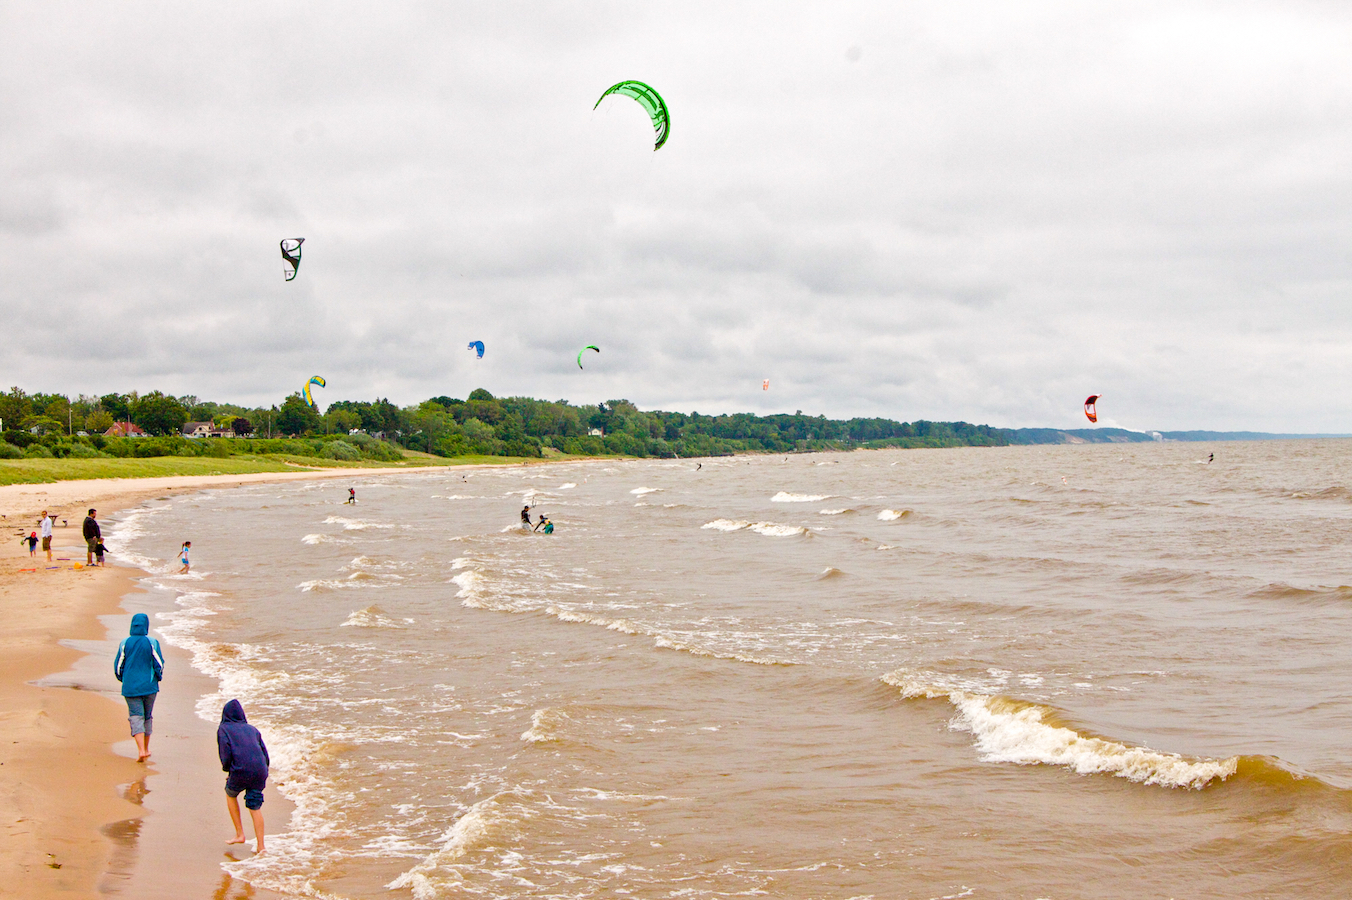

In [18]:
IMAGE_PATH = "https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image2.jpg"

!wget -q -O image.png $IMAGE_PATH
Image.open('image.png')

### Inference Utils

In [19]:
def display_results(image_path, interpreter, threshold=0.3):
    # Load the input image and preprocess it
    input_type = interpreter.get_input_details()[0]['dtype']
    preprocessed_image, original_image = preprocess_image(image_path, input_type)

    # =============Perform inference=====================
    start_time = time.monotonic()
    results = detect_objects(interpreter, preprocessed_image, threshold=threshold)
    print(f"Elapsed time: {(time.monotonic() - start_time)*1000} miliseconds")

    # =============Display the results====================
    original_numpy = original_image.numpy()
    for obj in results:
        # Convert the bounding box figures from relative coordinates
        # to absolute coordinates based on the original resolution
        ymin, xmin, ymax, xmax = obj['bounding_box']
        xmin = int(xmin * original_numpy.shape[1])
        xmax = int(xmax * original_numpy.shape[1])
        ymin = int(ymin * original_numpy.shape[0])
        ymax = int(ymax * original_numpy.shape[0])

        # Grab the class index for the current iteration
        idx = int(obj['class_id'])
        # Skip the background
        if idx >= len(LABELS):
            continue

        # draw the bounding box and label on the image
        color = [int(c) for c in COLORS[idx]]
        cv2.rectangle(original_numpy, (xmin, ymin), (xmax, ymax), 
                    color, 2)
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        label = "{}: {:.2f}%".format(LABELS[obj['class_id']],
            obj['score'] * 100)
        cv2.putText(original_numpy, label, (xmin, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # return the final image
    if type==np.float32:
        original_numpy = (original_numpy * 255).astype(np.uint8)
    return original_numpy

In [1]:
resultant_image = display_results("image.png", interpreter, threshold=0.3)
Image.fromarray(resultant_image)

NameError: ignored